In [37]:
import pandas as pd
data = pd.read_csv('Iris.csv')

In [38]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
data.shape[0]

150

In [40]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<AxesSubplot:>

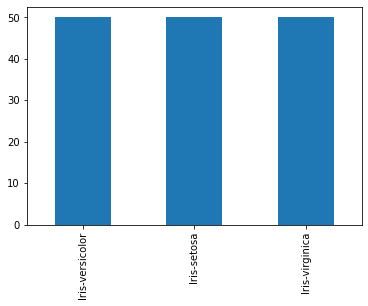

In [41]:
data.Species.value_counts().plot(kind='bar')

In [42]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [43]:
x[0],y[0]

(array([1. , 5.1, 3.5, 1.4, 0.2]), 'Iris-setosa')

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3)

In [45]:
len(x_train),len(x_test)

(105, 45)

In [46]:
import math
def knn(k):
    y_pred = list()
    for test_sample in x_test:
        e_d = list()
        freq = {'Iris-setosa':0,'Iris-versicolor':0,'Iris-virginica':0}
        for (sample,lable) in zip(x_train,y_train):
            distance = 0
            for feature in range(len(x_train[0])):
                distance+=(test_sample[feature]-sample[feature])**2
            distance = math.sqrt(distance)
            e_d.append([distance,lable])
        e_d = sorted(e_d)[:k]
        max_dist = e_d[0][0]
        min_dist = e_d[k-1][0]
        for i in e_d:
            freq[i[1]]+=(i[0]-min_dist)/(max_dist-min_dist)
        y_pred.append(max(freq, key = freq.get))
    return y_pred

In [47]:
from sklearn.metrics import accuracy_score
k_list = [i for i in range(3,15,2)]
k_accuracy = list()
for k in k_list:
    y_pred = knn(k)
    k_accuracy.append(accuracy_score(y_pred,y_test))

In [48]:
k_accuracy

[1.0, 1.0, 1.0, 1.0, 1.0, 0.9777777777777777]